In [12]:
import pandas as pd
df = pd.read_excel('Когортный анализ.xlsx')
df.head

<bound method NDFrame.head of        user_id       date  price
0        A0005 2020-03-25     50
1        A0005 2020-03-25     40
2        A0005 2020-03-26     70
3        A0005 2020-03-27     20
4        A0005 2020-03-29     50
...        ...        ...    ...
704835   Z9247 2021-01-10     20
704836   Z9247 2021-01-11     50
704837   Z9247 2021-01-11     70
704838   Z9247 2021-01-11     20
704839   Z9247 2021-01-11     40

[704840 rows x 3 columns]>

user_id         0
date            0
price           0
cohort          0
order_month     0
cohort_index    0
dtype: int64


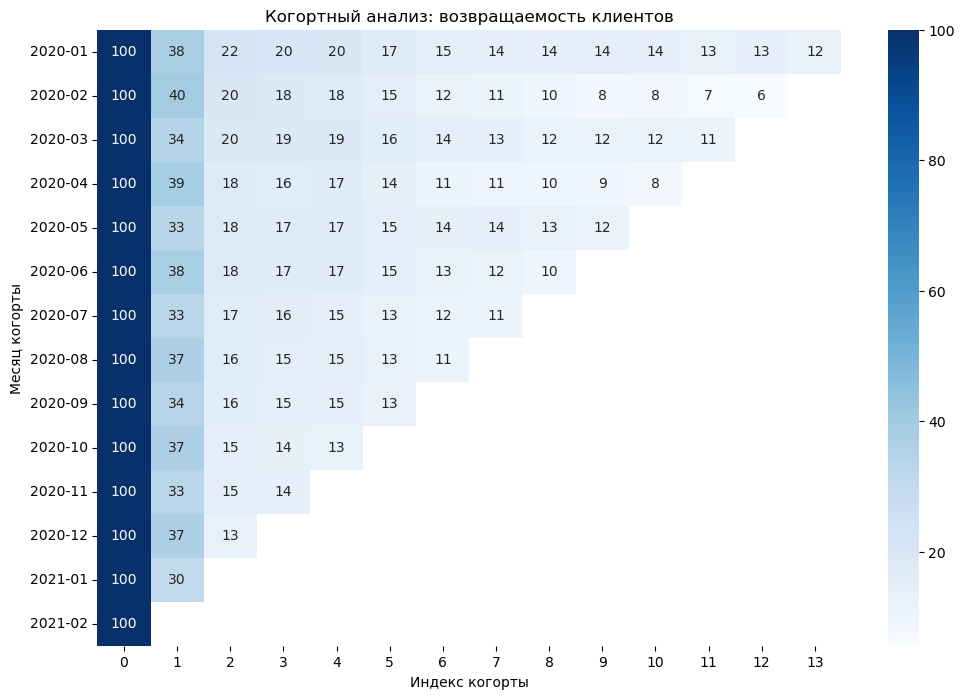

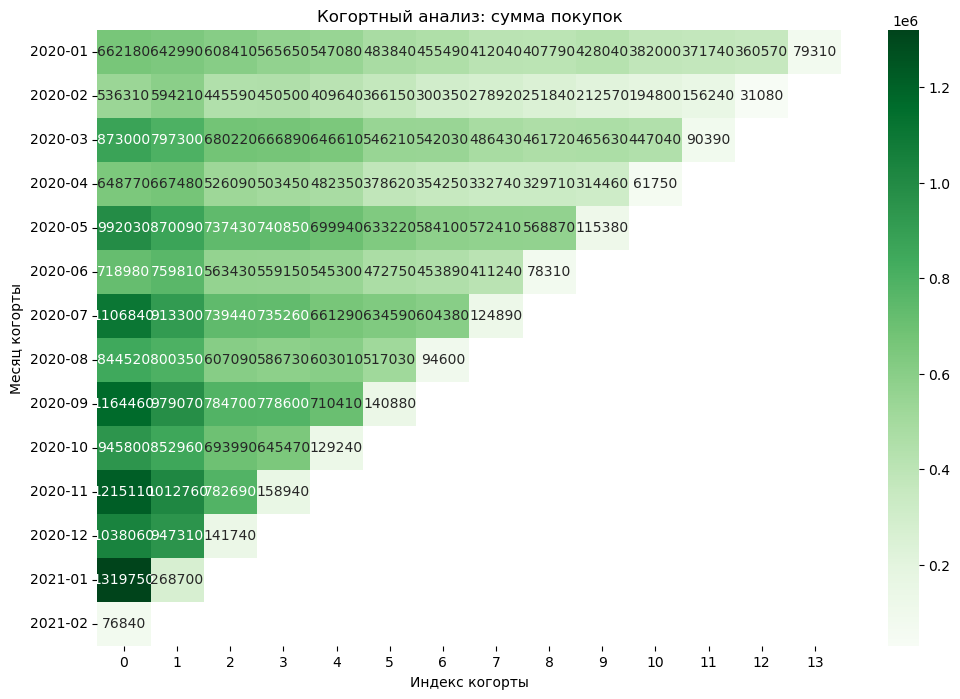

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

df['cohort'] = df.groupby('user_id')['date'].transform('min').dt.to_period('M')


df['order_month'] = df['date'].dt.to_period('M')

df['cohort_index'] = (df['order_month'] - df['cohort']).apply(lambda x: x.n)

cohort_data = df.groupby(['cohort', 'cohort_index'])['user_id'].nunique().reset_index()

cohort_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_index', values='user_id')

plt.figure(figsize=(12, 8))
plt.title('Когортный анализ: возвращаемость клиентов')
sns.heatmap(retention_matrix, annot=True, fmt='.0f', cmap='Blues', mask=retention_matrix.isnull())
plt.xlabel('Индекс когорты')
plt.ylabel('Месяц когорты')
plt.show()

cohort_data_sales = df.groupby(['cohort', 'cohort_index'])['price'].sum().reset_index()


cohort_pivot_sales = cohort_data_sales.pivot_table(index='cohort', columns='cohort_index', values='price')

plt.figure(figsize=(12, 8))
plt.title('Когортный анализ: сумма покупок')
sns.heatmap(cohort_pivot_sales, annot=True, fmt='.0f', cmap='Greens', mask=cohort_pivot_sales.isnull())
plt.xlabel('Индекс когорты')
plt.ylabel('Месяц когорты')
plt.show()

In [ ]:
#По первой работе: Во всех когортах наблюдается постепенное снижение возвращаемости клиентов с течением времени.А также спад возвращения клиентов
#Когорта 2020-01.Показывает относительно высокую возвращаемость на протяжении всех месяцев, является лучшей по возвращаемости 
#Когорта 2020-12.Показывает резкое падение возвращаемости на 2-й месяц (13%), что значительно ниже, чем у других когорт. Что является худшей
#Я бы исследовал, почему в некотрых когортах идёт резкий спад возвращаемости клиентов, основываясь на маркетинговых акциях в успешные периоды

#По второй работе:Во всех когортах наблюдается постепенное снижение суммы покупок с течением времени.
#Когорта 2020-07,2020-11 а также 2021-01.Имеют очень высокую сумму покупок в первый месяц, что значительно выше, чем у других когорт. Я бы исследовал, какие акции были в тот период
#Когорта 2021-01 имеет очень низкий показатель во втором месяце, я бы исследовал
#Я бы хотел понять, почему такой резкий спад в 2021-01

